Exercise 1 - Distributed data anlytics

Arailym Kaiyrova

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter

Q1.1. Word Count Program

In [3]:
#read the data file
link = 'README.md'
text = open(link, 'r').read().lower()


In [4]:
def text_to_words(text):
    words_count = Counter([])
    l, r = -1, 1
    while r<len(text):
        if text[r].isalpha():r+=1
        elif r-l==1: l, r = l+1, r+1
        else:
            words_count[text[l+1:r]]+=1 #adds the value between two non-alphabetic characters to the words list
            l, r = r, r+1
    return words_count

def remove_stop_words(words, stop_words):
    for s in stop_words:
        if words[s]>0:del words[s] #if stop-word in the words list, then removes it


def top_k_words(words, k):
    heap = [(-count,word) for word,count in words.items()] #temporary array with negative frequency
    heapq.heapify(heap)
    res = {}
    for i in range(k):
        neg_count, word = heapq.heappop(heap) #pops the word with highest negative frequency
        res[word] = -neg_count #adds that word to the result dictionary
    return res

In [5]:
stop_words = stopwords.words("english") #stop-words list from nltk library

words_count = text_to_words(text)
remove_stop_words(words_count, stop_words)

Finding top 10 occuring words using heap data structure

In [6]:
top10 = top_k_words(words_count, 10)
print(top10)
top10_heap = pd.DataFrame.from_dict(top10, orient='index', columns={'frequency'}).reset_index()
top10_heap = top10_heap.rename(columns={'index':'word', 0:'count'})
top10_heap

{'tensorflow': 37, 'tf': 34, 'https': 28, 'github': 22, 'detection': 21, 'models': 19, 'object': 18, 'com': 17, 'api': 16, 'g': 16}


,word,frequency
0,tensorflow,37
1,tf,34
2,https,28
3,github,22
4,detection,21
5,models,19
6,object,18
7,com,17
8,api,16
9,g,16


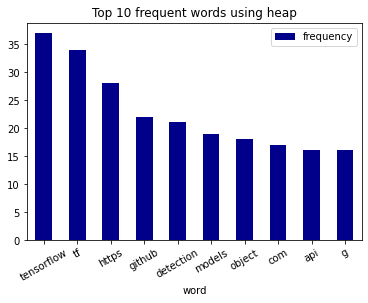

In [169]:
top10_heap_plot = top10_pd.plot.bar(title = 'Top 10 frequent words using heap',x='word', y='frequency', color='DarkBlue',rot=30)

Finding top 10 occuring words using pandas library

In [118]:
df_count1 = pd.DataFrame.from_dict(words_count, orient='index', columns={'frequency'}).reset_index()
df_count1 = df_count1.rename(columns={'index':'word', 0:'count'})
top10_pd = df_count1.nlargest(10, 'frequency')
top10_pd

,word,frequency
1,tensorflow,37
132,tf,34
5,https,28
13,github,22
3,detection,21
28,models,19
2,object,18
14,com,17
4,api,16
63,g,16


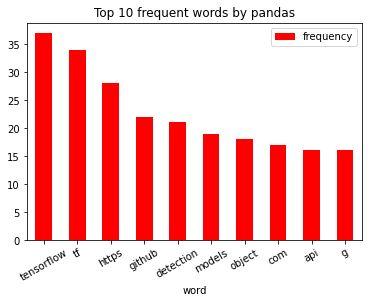

In [192]:
ttop10_pd_plot = top10_pd.plot.bar(title = 'Top 10 frequent words by pandas',x='word', y='frequency', color='Red',rot=30)

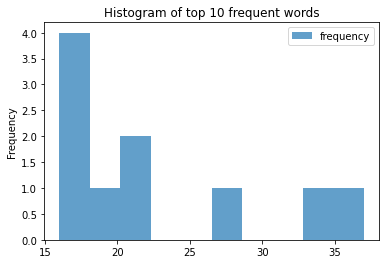

In [213]:
top10_pd.plot.hist(title='Histogram of top 10 frequent words',alpha=0.7,bins=10);

Top 10 most frequent words using regex approach

In [191]:
import re as regex
words_count2 = Counter(regex.findall('\w+', text.lower()))
remove_stop_words(words_count2, stop_words)
df2 = pd.DataFrame.from_dict(words_count2, orient='index', columns={'frequency'}).reset_index()
df2 = df.rename(columns={'index':'word', 0:'count'})
df2.nlargest(10, 'frequency')

,word,frequency
1,tensorflow,37
132,tf,34
5,https,28
13,github,22
3,detection,21
28,models,19
2,object,18
14,com,17
4,api,16
63,g,16


Q 1.1 Matrix Multiplication

In [135]:
N, M = 100, 2
mean, std = 2, 0.01

a = np.random.random(size = (N,M))
v = np.random.normal(mean, std, size = (M,1))

In [ ]:
def multiply(a, v, N, M):
    c = np.zeros((N, 1))
    for n in range(N):
        for m in range(M):
            c[n,0]+=(a[n,m]*v[m,0])
    return c

In [185]:
c = pd.DataFrame(multiply(a, v, N, M),columns={'Vector C'})
c.describe().to_clipboard()

Histogram of vector C using matplotlib

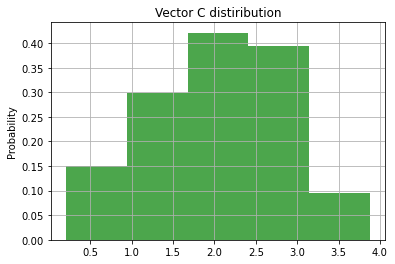

In [144]:
def plot_histogram(x):
    n, bins, patches = plt.hist(x, 5, density=1, facecolor='g', alpha=0.7)
    plt.ylabel('Probability')
    plt.title('Vector C distiribution')
    plt.grid(True)
    plt.show()
plot_histogram(c)

Histogram of vector C using pandas

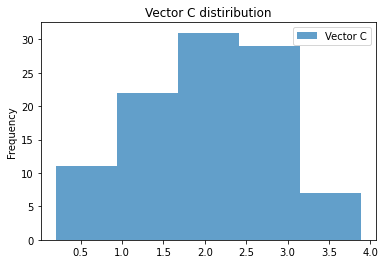

In [145]:
c.plot.hist(title='Vector C distiribution',alpha=0.7, bins=5);

Q 1.2 Linear Regression through exact form

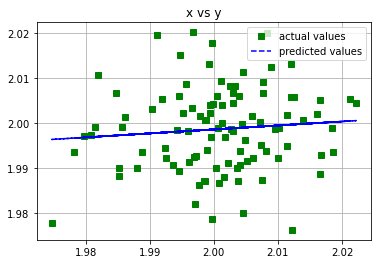

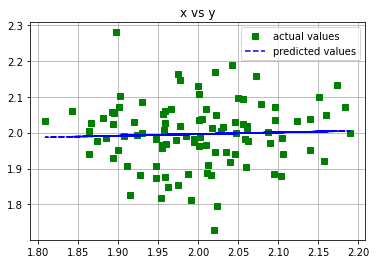

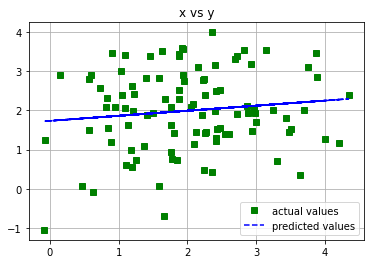

In [225]:
def generate_normal_matrix(N, M, mean, std):
    return np.random.normal(mean, std, size = (N,M))

def calculate_rss(y_actual, y_pred):
    res = 0
    for i in range(len(y_actual)):
        res+=(pow((y_actual[i]-y_pred[i]),2))
    return res/len(y_actual)

def learn_simple_linreg(A):
    x_mean, y_mean = A[:,0].mean(), A[:,1].mean()
    num = denum = 0
    for i in range(len(A[:,0])):
        c = A[i][0]-x_mean
        num+=(c*(A[i][1]-y_mean))
        denum+=(c*c)
    b1 = num/denum
    b0 = y_mean - (b1*x_mean)
    return b1, b0

def predict_simple_linreg(A, b1, b0):
    y_pred = np.zeros(len(A[:,0]))
    for i in range(len(A[:,0])):
        y_pred[i] = b1*A[i,0]+b0
    return y_pred

def plot_line_graph(A, y_pred,mean,std):
    plt.plot(A[:,0], A[:,1], 'gs', label='actual values')
    plt.plot(A[:,0], y_pred, 'b--', label='predicted values')
    plt.title('x vs y')
    plt.grid()
    plt.legend()
    plt.show()

N, M, mean = 100, 2, 2
std = [0.01, 0.1, 1]

df_linreg = pd.DataFrame(columns=['Standard deviation','quadratic loss','b0','b1','b0_lstsq','b1_lstsq'])

for i in range(len(std)):
    A = generate_normal_matrix(N, M, mean, std[i])
    
    
    b1, b0 = learn_simple_linreg(A)
    y_pred = predict_simple_linreg(A, b1, b0)
    plot_line_graph(A, y_pred,mean,std[i])
    rss = calculate_rss(A[:,1],y_pred)
    

    x = np.column_stack([A[:,0], np.ones(N).transpose()])
    s, m = np.linalg.lstsq(x,A[:,1], rcond = True)[0]
    
    
    df_linreg.loc[i] = [std[i], rss, b0, b1, m, s]


In [224]:
df_linreg.to_clipboard()

This dataframe stores the values of b0, b1, mean, sigma from lstsq algorithm, and quadratic loss 
for each standard deviation. 
In this dataframe, we can clearly see that the values calculated by simple_linreg algoritm are same as the mean and sigma calculated by lstq. 
Also, we can see that for higher standard deviations, there are
higher quadratic loss

Results when b0 = 0

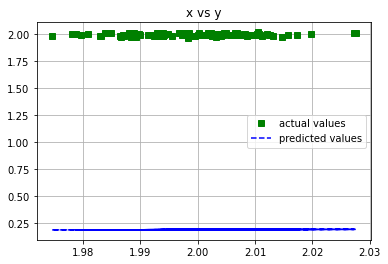

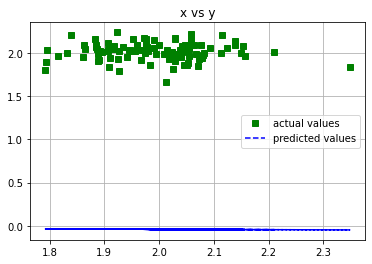

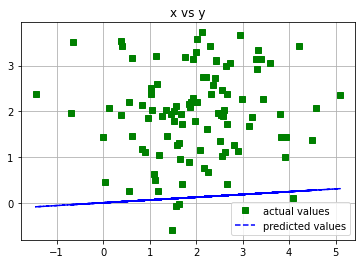

In [226]:
for i in range(len(std)):
    A = generate_normal_matrix(N, M, mean, std[i])
    
    
    b1, b0 = learn_simple_linreg(A)
    b0 = 0
    y_pred = predict_simple_linreg(A, b1, b0)
    plot_line_graph(A, y_pred,mean,std[i])
    rss = calculate_rss(A[:,1],y_pred)

    x = np.column_stack([A[:,0], np.ones(N).transpose()])
    m, s = np.linalg.lstsq(x,A[:,1], rcond = True)[0]
    

Results when b1 = 0

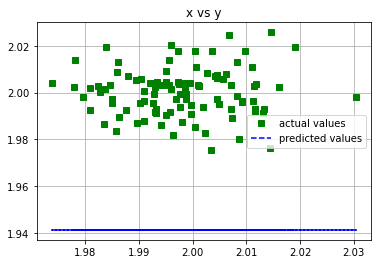

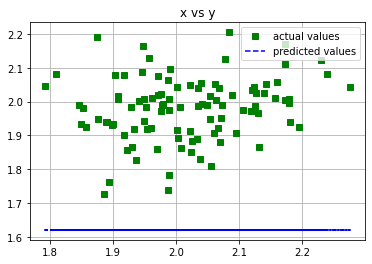

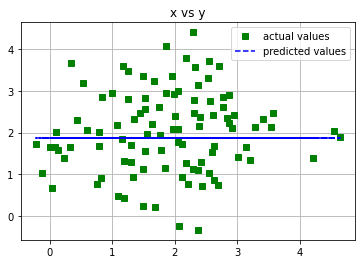

In [227]:
for i in range(len(std)):
    A = generate_normal_matrix(N, M, mean, std[i])
    
    
    b1, b0 = learn_simple_linreg(A)
    b1 = 0
    y_pred = predict_simple_linreg(A, b1, b0)
    plot_line_graph(A, y_pred,mean,std[i])
    rss = calculate_rss(A[:,1],y_pred)

    x = np.column_stack([A[:,0], np.ones(N).transpose()])
    m, s = np.linalg.lstsq(x,A[:,1], rcond = True)[0]